# BN Toolbox Example
--------
Example comparing the BN Toolboox to [pgmpy](https://pgmpy.org) (ground truth).

## BN Toolbox
Intialize a BN using the implemented toolbox

In [20]:
from model import *

In [21]:
"""
Intialize model:
----------
Traffic Accident : A
Heavy Rain       : R
Traffic Jam      : J
Getting up Late  : G
Late for School  : L
Long Queues      : Q

"""

# parent -> child net input
myModel = Model([('A', 'J'),
                 ('R', 'J'),
                 ('G', 'L'),
                 ('J', 'L'),
                 ('J', 'Q')])


# create CPDs
cpd = {'node': 'A',
               # A0 A1
       'cpt' : [[0.2], [0.8]],
       'evid': None,
      }
myModel.addCPD(cpd)

cpd = {'node': 'R',
               # R0 R1
       'cpt' : [[0.4], [0.6]],
       'evid': None
       }
myModel.addCPD(cpd)


cpd = {'node': 'J',
                # R0 R0 R1 R1
                # A0 A1 A0 A1
       'cpt' : [[0.9, 0.6, 0.7, 0.1],
                [0.1, 0.4, 0.3, 0.9]],
       'evid': ['R', 'A'],
       }
myModel.addCPD(cpd)

cpd = {'node': 'G',
       'cpt' : [[0.6], [0.4]],
       'evid': None,
       }
myModel.addCPD(cpd)

cpd = {'node': 'L',
       'cpt' : [[0.9, 0.45, 0.8, 0.1],
                [0.1, 0.55, 0.2, 0.9]],
       'evid': ['G', 'J'],
       }
myModel.addCPD(cpd)

cpd = {'node': 'Q',
       'cpt' : [[0.9, 0.2],
                [0.1, 0.8]],
       'evid': ['J'],
       }

# add CPDs to the model
myModel.addCPD(cpd)

## pgmpy
Intialize pgmpy model

In [22]:
# Create model
from pgmpy.models import BayesianModel

In [23]:
traffic_model = BayesianModel([('A', 'J'),
                       ('R', 'J'),
                       ('J', 'L'),
                       ('G', 'L'),
                       ('J', 'Q')])

In [24]:
# Define parameters
from pgmpy.factors.discrete import TabularCPD

cpd_accident = TabularCPD(variable='A', variable_card=2,
                      values=[[0.2], [0.8]])

cpd_rain = TabularCPD(variable='R', variable_card=2,
                        values=[[0.4], [0.6]])

cpd_jam = TabularCPD(variable='J', variable_card=2,
                        values=[[0.9, 0.6, 0.7, 0.1],
                                [0.1, 0.4, 0.3, 0.9]],
                        evidence=['R', 'A'],
                        evidence_card=[2,2])

cpd_gettingup = TabularCPD(variable='G', variable_card=2,
                      values=[[0.6], [0.4]])

cpd_late = TabularCPD(variable='L', variable_card=2,
                      values=[[0.9, 0.45, 0.8, 0.1],
                             [0.1, 0.55, 0.2, 0.9]],
                      evidence=['G', 'J'], evidence_card=[2, 2])

cpd_queues = TabularCPD(variable='Q', variable_card=2,
                      values=[[0.9, 0.2],
                             [0.1, 0.8]],
                      evidence=['J'], evidence_card=[2])

In [25]:
traffic_model.add_cpds(cpd_accident, cpd_rain, cpd_jam, cpd_gettingup, cpd_late, cpd_queues)

traffic_model.check_model()

True

In [26]:
from pgmpy.inference import VariableElimination
traffic_infer = VariableElimination(traffic_model)

## Sample Queries

### Query 1
----
#### pgmpy (ground truth)

In [27]:
traffic_q1 = traffic_infer.query(variables=['J'])
print(traffic_q1['J'])

╒═════╤══════════╕
│ J   │   phi(J) │
╞═════╪══════════╡
│ J_0 │   0.3960 │
├─────┼──────────┤
│ J_1 │   0.6040 │
╘═════╧══════════╛


#### BNToolbox: Variable Elimination

In [28]:
# impleneted model query
myModel.query('J', inf_type='VE',e={})

,J,Pr
VE,,
0,J_0,0.3960
1,J_1,0.6040


#### BNToolbox: Gibbs Sampling

Sampler appear to first reach exact solution at timestep: 5260


,J,Pr
Gibbs,,
0,J_0,0.397
1,J_1,0.603


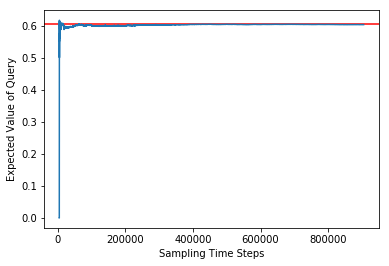

In [29]:
# impleneted model query
myModel.query('J', inf_type='Gibbs',e={})

### Query 2
---
#### pgmpy (ground truth)

In [30]:
traffic_q2 = traffic_infer.query(variables=['L'], evidence={'R': 1, 'J': 0, 'G':1})
print(traffic_q2['L'])

╒═════╤══════════╕
│ L   │   phi(L) │
╞═════╪══════════╡
│ L_0 │   0.8000 │
├─────┼──────────┤
│ L_1 │   0.2000 │
╘═════╧══════════╛


#### BNToolbox: Variable Elimination

In [31]:
myModel.query('L', inf_type='VE',  e={'R': 1, 'J': 0, 'G':1})

,L,Pr
VE,,
0,L_0,0.8000
1,L_1,0.2000


#### BNToolbox: Gibbs Sampling

Sampler appear to first reach exact solution at timestep: 5020


,L,Pr
Gibbs,,
0,L_0,0.801
1,L_1,0.199


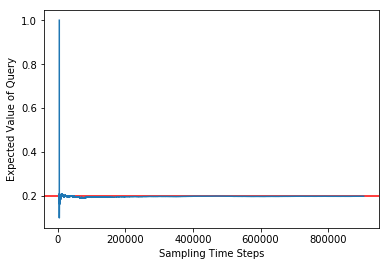

In [32]:
myModel.query('L', inf_type='Gibbs',  e={'R': 1, 'J': 0, 'G':1})

### Query 3
---
#### pgmpy (ground truth)

In [33]:
traffic_q3 = traffic_infer.query(variables=['A'], evidence={'Q': 1})
print(traffic_q3['A'])

╒═════╤══════════╕
│ A   │   phi(A) │
╞═════╪══════════╡
│ A_0 │   0.0972 │
├─────┼──────────┤
│ A_1 │   0.9028 │
╘═════╧══════════╛


#### BNToolbox: Variable Elimination

In [34]:
myModel.query('A',  inf_type='VE', e={'Q': 1})

,A,Pr
VE,,
0,A_0,0.0972
1,A_1,0.9028


#### BNToolbox: Gibbs Sampling

Sampler appear to first reach exact solution at timestep: 904995


,A,Pr
Gibbs,,
0,A_0,0.096
1,A_1,0.904


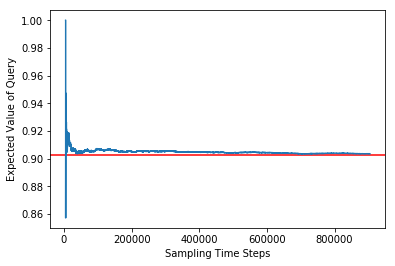

In [35]:
myModel.query('A', inf_type='Gibbs', e={'Q': 1})